In [1]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keras==2.3.1
!pip install tensorflow==1.14.0

     |████████████████████████████████| 377 kB 5.0 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.3.1 which is incompatible.
     |████████████████████████████████| 109.3 MB 48 kB/s 
     |████████████████████████████████| 488 kB 58.6 MB/s 
     |████████████████████████████████| 3.1 MB 41.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator

In [3]:
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [4]:
#Initializing the CNN
#there is also a graph option but we'll use sequential ANN Model
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  


In [5]:
#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.


In [6]:
#step -3 Flattening
classifier.add(Flatten())

In [7]:
#step-4 Full connection step
classifier.add(Dense( 256, activation = 'relu'))
classifier.add(Dense( 1, activation = 'sigmoid'))
#binary outcome

In [8]:
#compiling the cnn

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
#Fitting to CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'drive/MyDrive/two/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'drive/MyDrive/two/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
#We'll try to train with 100 Epochs
results=classifier.fit_generator(
        training_set,
        samples_per_epoch=130,
        nb_epoch=25,
        validation_data=test_set,
        nb_val_samples=18,verbose=1)

Found 130 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., verbose=1, steps_per_epoch=4, epochs=25, validation_steps=18)`



Epoch 1/25
4/4 [==============================] - 40s 10s/step - loss: 0.8466 - accuracy: 0.4796 - val_loss: 0.7993 - val_accuracy: 0.5263
Epoch 2/25
4/4 [==============================] - 16s 4s/step - loss: 0.6933 - accuracy: 0.5703 - val_loss: 0.7013 - val_accuracy: 0.4737
Epoch 3/25
4/4 [==============================] - 14s 4s/step - loss: 0.7058 - accuracy: 0.4082 - val_loss: 0.5926 - val_accuracy: 0.6316
Epoch 4/25
4/4 [==============================] - 14s 3s/step - loss: 0.6231 - accuracy: 0.7857 - val_loss: 0.5588 - val_accuracy: 0.7368
Epoch 5/25
4/4 [==============================] - 14s 3s/step - loss: 0.5517 - accuracy: 0.8265 - val_loss: 0.4883 - val_accuracy: 1.0000
Epoch 6/25
4/4 [==============================] - 11s 3s/step - loss: 0.5267 - accuracy: 0.8163 - val_loss: 0.4296 - val_accuracy: 0.8421
Epoch 7/25
4/4 [==============================] - 14s 4s/step - loss: 0.3514 - accuracy: 0.8776 - val_loss: 0.3052 - val_accuracy: 1.0000
Epoch 8/25
4/4 [================

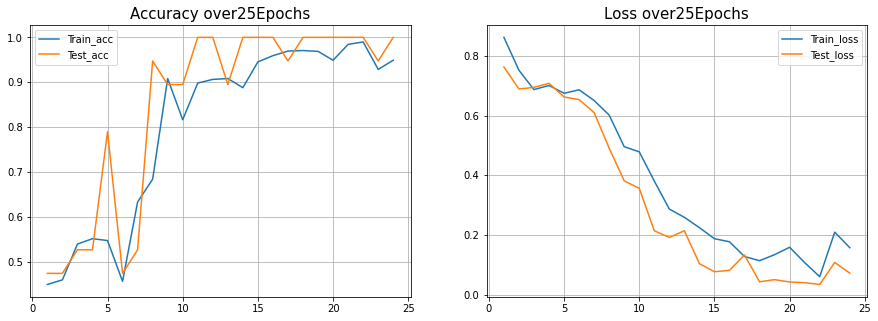

[[0.59183675, 0.4489796, 0.45918366, 0.5390625, 0.5510204, 0.546875, 0.45588234, 0.6328125, 0.68367344, 0.90816325, 0.81632656, 0.8979592, 0.90625, 0.90816325, 0.8877551, 0.9453125, 0.9591837, 0.96938777, 0.9705882, 0.96875, 0.9489796, 0.984375, 0.9897959, 0.9285714, 0.9489796]]
Accuracy : 0.7939147


In [ ]:
import matplotlib.pyplot as plt
import statistics
list1=[]
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over' + str(epochs) +  'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 list1.append(acc)
plot_acc_loss(results, 25)
x=0
for i in list1:
  x=i
print(list1)
print("Accuracy :",statistics.mean(x))

In [ ]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image

test_image = image.load_img('drive/MyDrive/two/single_prediction/covid19.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(result)
print(training_set.class_indices)


[[0.]]
{'covid': 0, 'normal': 1}


Populating the interactive namespace from numpy and matplotlib


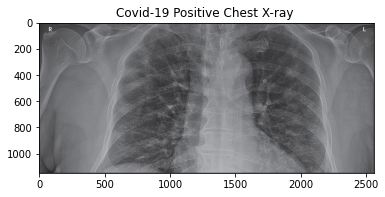

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('drive/MyDrive/two/single_prediction/covid19.jpg')
imgplot = plt.imshow(img)
plt=plt.title('Covid-19 Positive Chest X-ray ')


In [ ]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)


AI's prediction is: covid


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


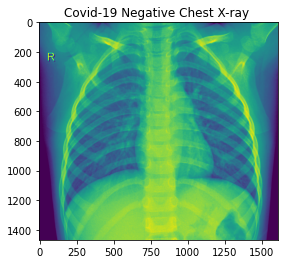

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('drive/MyDrive/two/single_prediction/normal.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('Covid-19 Negative Chest X-ray ')


In [ ]:
test_image = image.load_img('drive/MyDrive/two/single_prediction/normal.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(result)

[[1.]]


In [ ]:
if 0.5<=result[0][0] <= 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: normal


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grayscale
def BGR2GRAY(img):
	# Grayscale
	gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
	return gray

# Canny Edge dedection
def Canny_edge(img):
	# Canny Edge 
    canny_edges = cv2.Canny(img,100,200)
    return canny_edges

# Gabor Filter
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
	# get half size
	d = K_size // 2

	# prepare kernel
	gabor = np.zeros((K_size, K_size), dtype=np.float32)

	# each value
	for y in range(K_size):
		for x in range(K_size):
			# distance from center
			px = x - d
			py = y - d

			# degree -> radian
			theta = angle / 180. * np.pi

			# get kernel x
			_x = np.cos(theta) * px + np.sin(theta) * py

			# get kernel y
			_y = -np.sin(theta) * px + np.cos(theta) * py

			# fill kernel
			gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

	# kernel normalization
	gabor /= np.sum(np.abs(gabor))

	return gabor


# Use Gabor filter to act on the image
def Gabor_filtering(gray, K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get shape
    H, W = gray.shape

    # padding
    gray = np.pad(gray, (K_size//2, K_size//2), 'edge')

    # prepare out image
    out = np.zeros((H, W), dtype=np.float32)

    # get gabor filter
    gabor = Gabor_filter(K_size=K_size, Sigma=Sigma, Gamma=Gamma, Lambda=Lambda, Psi=0, angle=angle)
        
    # filtering
    for y in range(H):
        for x in range(W):
            out[y, x] = np.sum(gray[y : y + K_size, x : x + K_size] * gabor)

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


# Use 6 Gabor filters with different angles to perform feature extraction on the image
def Gabor_process(img):
    # get shape
    H, W, _ = img.shape

    # gray scale
    gray = BGR2GRAY(img).astype(np.float32)

    # define angle
    #As = [0, 45, 90, 135]
    As = [0,30,60,90,120,150]

    # prepare pyplot
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    out = np.zeros([H, W], dtype=np.float32)

    # each angle
    for i, A in enumerate(As):
        # gabor filtering
        _out = Gabor_filtering(gray, K_size=9, Sigma=1.5, Gamma=1.2, Lambda=1, angle=A)

        # add gabor filtered image
        out += _out

    # scale normalization
    out = out / out.max() * 255
    out = out.astype(np.uint8)

    return out

In [ ]:
'''

            K NEAREST NEIGHBOR ALGORITHM


'''


''' imports '''
from random import randrange
from csv import reader
from math import sqrt
import os



'''
Calculate the Euclidean distance
between two vectors of data
'''
def euclidean_distance(arr1, arr2):
    distance = 0.0
    for i in range(1, len(arr2)-1):
        distance += np.sum(np.square(arr1[i]-arr2[i]))
    return np.sqrt(distance)



'''
Cross validation method to split a data into n folds,
return grouped data inside a list
'''
def cross_validation_split(data, n_folds):
    data_split = list()
    data_copy = list(data)
    fold_size = int(len(data) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(data_copy))
            fold.append(data_copy.pop(index))
        data_split.append(fold)
    return data_split


'''
Runs knn algorithm through applying cross validation
on training data in case test dataset is not provided
'''
def knn_with_CV(dataset, n_folds,k):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = knn(train_set, test_set, k)
        actual = [row[-1] for row in fold]
        accuracy = get_accuracy(actual, predicted)
        scores.append(accuracy)
    return scores


'''
Runs knn algorithm with the provided test dataset
'''
def knn(train_set, test_set, k):
    scores = list()
    predicted = knn_helper(train_set, test_set, k)
    actual = [row[-1] for row in test_set]
    accuracy = get_accuracy(actual, predicted)
    scores.append(accuracy)
    return scores


'''
K Nearest Neighbor algorithm to classify
the image according to the majority of 
the k neighbors' labels
'''
def knn_helper(train, test, k):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, k)
        predictions.append(output)
    return(predictions)

'''
Predict label of the image through finding
the majority of the labels among k neighbors
'''
def predict_classification(train, test_row, k):
    neighbors = get_neighbors(train, test_row, k)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

'''
Return the list of nearest k neighbors of test_row
after obtaining and sorting the distances
between test data and all training data
'''
def get_neighbors(train, test_row, k):
    '''
    keep all distances with their relevant
    data rows to find k neighbors 
    '''
    distances = list()
    
    for train_row in train:
        # get euclidean distance between attributes of rows
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    '''
    sort distances in ascending order to
    get the k nearest neighbors
    '''
    distances.sort(key=lambda tup: tup[1])
    neighbors = list() # stores k neighbors
    # get k nearest neighbors with least distances
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors


'''
Calculate the accuracy of classification
through calculating the actual and predicted
result
'''
def get_accuracy(actual, predicted):
    correct = 0 # number of correct classifications
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1

    return correct / float(len(actual)) * 100.0

we are there
[('nejmoa2001191_f1-PA.jpeg', array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([12, 18, 17, ..., 18,  8,  6], dtype=uint8), 'covid'), ('1-s2.0-S0140673620303706-fx1_lrg.jpg', array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([ 87,  94, 100, ..., 152, 140, 130], dtype=uint8), 'covid'), ('nejmc2001573_f1a.jpeg', array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([92, 94, 96, ..., 82, 79, 79], dtype=uint8), 'covid'), ('lancet-case2a.jpg', array([  0,   0,   0, ..., 255,   0,   0], dtype=uint8), array([134, 135, 134, ...,  80,  59,  49], dtype=uint8), 'covid'), ('auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', array([  0, 255,   0, ...,   0,   0,   0], dtype=uint8), array([220, 209, 198, ..., 131, 121, 116], dtype=uint8), 'covid'), ('NORMAL2-IM-1288-0001.jpeg', array([  0, 255,   0, ...,   0,   0,   0], dtype=uint8), array([74, 84, 99, ..., 14,  3,  0], dtype=uint8), 'normal'), ('NORMAL2-IM-1281-0001.jpeg', array([  0, 255,   0, ...,   0,   0,   0],

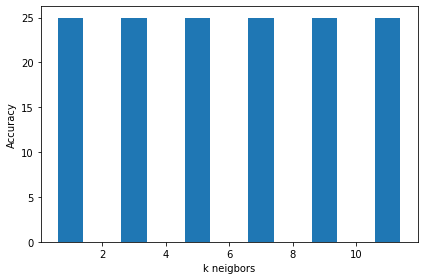

In [ ]:
'''
        MAIN PROGRAM TO RUN TWO DIFFERENT ALGORITHMS
                    KNN AND WEIGHTED_KNN

'''

import matplotlib.pyplot as plt
from random import randrange
from csv import reader
from math import sqrt
import time
import os

'''
import modules
'''


'''

PLEASE DETERMINE THE SIZE OF THE
TRAINING AND SET DATA

'''
TRAINING_SIZE = 12
TEST_SIZE = 4


training_data = list()
test_data = list()

'''
dimensions to resize the image
to smaller size
'''
dim = (64,64)

'''
Read images and obtain their features 
through using Canny edge detection and
Gabor filter
'''
i = 0
images = os.listdir('drive/MyDrive/all/train/covid/')

for image in images:
    img = cv2.imread("drive/MyDrive/all/train/covid/"+image)
    # resize the image with predefined dimensions

    img = cv2.resize(img,dim, interpolation=cv2.INTER_AREA)

    # apply Gabor filter to the image
    out = Gabor_process(img)
    # turn filtered image into vector for image processing
    gabor = np.reshape(out, -1)
    # apply Canny edge detection
    out = Canny_edge(img)
    # turn it into vector
    canny = np.reshape(out, -1)
    training_data.append((image, canny, gabor, "covid"))
    i+=1
    if i > TRAINING_SIZE/3:
        break;


i = 0
images = os.listdir("drive/MyDrive/all/train/normal/")
for image in images:
    img = cv2.imread("drive/MyDrive/all/train/normal/"+image)
    img = cv2.resize(img,dim, interpolation=cv2.INTER_AREA)

    out = Gabor_process(img)
    gabor = np.reshape(out, -1)
    out = Canny_edge(img)
    canny = np.reshape(out, -1)
    training_data.append((image, canny, gabor, "normal"))
    i+=1
    if i > TRAINING_SIZE/3:
        break;


i = 0
images = os.listdir("drive/MyDrive/all/train/pneumonia_vir/")
for image in images:
    img = cv2.imread("drive/MyDrive/all/train/pneumonia_vir/"+image)
    img = cv2.resize(img,dim, interpolation=cv2.INTER_AREA)

    out = Gabor_process(img)
    gabor = np.reshape(out, -1)
    out = Canny_edge(img)
    canny = np.reshape(out, -1)
    training_data.append((image, canny, gabor, "pneumonia_vir"))
    i+=1
    if i > TRAINING_SIZE/3:
        break;

'''
READ TEST DATA
'''
i = 0
images = os.listdir("drive/MyDrive/all/test/")

for image in images:


    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    out = Gabor_process(img)
    gabor = np.reshape(out, -1)
    out = Canny_edge(img)
    canny = np.reshape(out, -1)
    name = image.split(" ")[0]
    test_data.append((image, canny, gabor, name))
    i+=1
    if i > TEST_SIZE:
        break;


print("we are there")
print(training_data)
n_folds = 5 # number of folds used in croos-validation
k_values = [1, 3, 5, 7, 9, 11]
accuracy_list = []
for k in k_values:
    '''
    Call "knn" to run KNN algorithm
    Call "weighted_knn" function for weighted KNN algorithm
    '''
    scores = knn(training_data, test_data, k)
    #scores = weighted_knn(training_data, test_data, k)
    accuracy_list.append(sum(scores)/float(len(scores)))


'''
Print accuracy values for each k value
and show mean accuracy
'''
for i, acc in zip(k_values, accuracy_list):
    print("k value = ", i, "    Accuracy = ", acc)

print("Mean Accuracy: %.3f%%" % (sum(accuracy_list)/float(len(accuracy_list))))

'''
Plot the accuracy results
'''
plt.xlabel("k neigbors")
plt.ylabel("Accuracy")
plt.bar(k_values, accuracy_list)
plt.tight_layout()
plt.show()